In [ ]:
import pandas as pd

df = pd.read_csv("observations-407.csv", low_memory=False)
df.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,349,2021-04-30,2021-04-30,NaN,Madrid,4,xasalva,xavi salvador costa,2022-04-16 10:48:58 UTC,2023-12-21 15:28:05 UTC,...,NaN,NaN,False,NaN,NaN,Spirobranchus triqueter,Spirobranchus triqueter,NaN,Annelida,251212
1,354,2021-09-12 09:36:38,2021-09-12,2021-09-12 07:36:38 UTC,Madrid,4,xasalva,xavi salvador costa,2022-04-16 10:49:28 UTC,2023-12-21 15:28:05 UTC,...,NaN,NaN,False,NaN,NaN,Nereididae,Nereididae,NaN,Annelida,1679
2,356,2021-08-14 20:03:38,2021-08-14,2021-08-14 18:03:38 UTC,Madrid,4,xasalva,xavi salvador costa,2022-04-16 10:49:29 UTC,2023-12-21 15:28:05 UTC,...,NaN,NaN,False,NaN,NaN,Protula intestinum,Protula intestinum,NaN,Annelida,244092
3,359,2021-04-30,2021-04-30,NaN,Madrid,4,xasalva,xavi salvador costa,2022-04-16 10:49:30 UTC,2023-12-21 15:28:05 UTC,...,NaN,NaN,False,NaN,NaN,Actinia striata,Actinia striata,NaN,Cnidaria,253919
4,361,2021-07-22,2021-07-22,NaN,Madrid,4,xasalva,xavi salvador costa,2022-04-16 10:49:31 UTC,2023-12-21 15:28:05 UTC,...,NaN,NaN,False,NaN,NaN,Branchiomma luctuosum,Branchiomma luctuosum,NaN,Annelida,34800


In [1]:
# Define columns to be dropped
delete_cols = [
    "id",
    "observed_on_string",
    "observed_on",
    "time_zone",
    "user_id",
    "user_login",
    "user_name",
    "created_at",
    "updated_at",
    "geoprivacy",
    "taxon_geoprivacy",
    "coordinates_obscured",
    "positioning_method",
    "positioning_device",
    "time_observed_at",
    "user_id",
    "user_login",
    "user_name",
    "created_at",
    "updated_at",
    "geoprivacy",
    "taxon_geoprivacy",
    "coordinates_obscured",
    "positioning_method",
    "positioning_device",
    "captive_cultivated",
    "positional_accuracy",
    "private_place_guess",
    "private_latitude",
    "private_longitude",
    "public_positional_accuracy",
    "sound_url",
    "oauth_application_id",
    
]

df.drop(columns=delete_cols, inplace=True)
df

NameError: name 'df' is not defined

In [ ]:
# Count how many observations are per species_guess
species_counts = df["species_guess"].value_counts()
species_counts


species_guess
Salpa                    2685
Castañuela               2315
Perca                    2070
Doncella                 2046
Mojarra                  1917
                         ... 
Sargo-bicudo                1
Red Fire Goby               1
Dog-tooth Tuna              1
Pennant Butterflyfish       1
Forceps Fish                1
Name: count, Length: 2744, dtype: int64

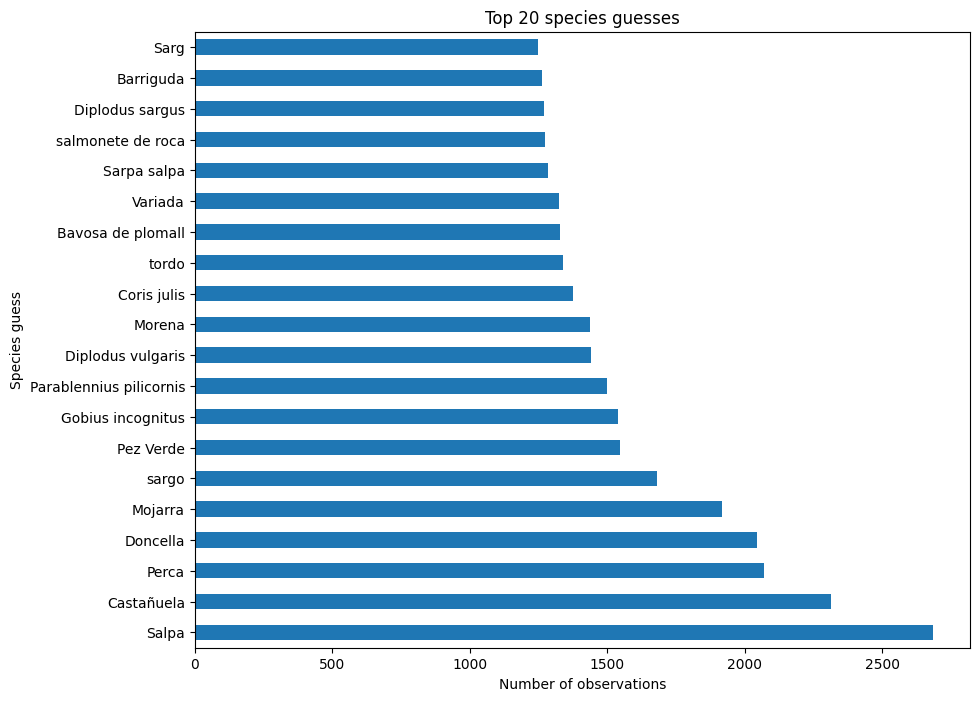

In [ ]:
# do bar plot horizontal
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
species_counts[:20].plot(kind="barh")
plt.title("Top 20 species guesses")
plt.xlabel("Number of observations")
plt.ylabel("Species guess")
plt.show()

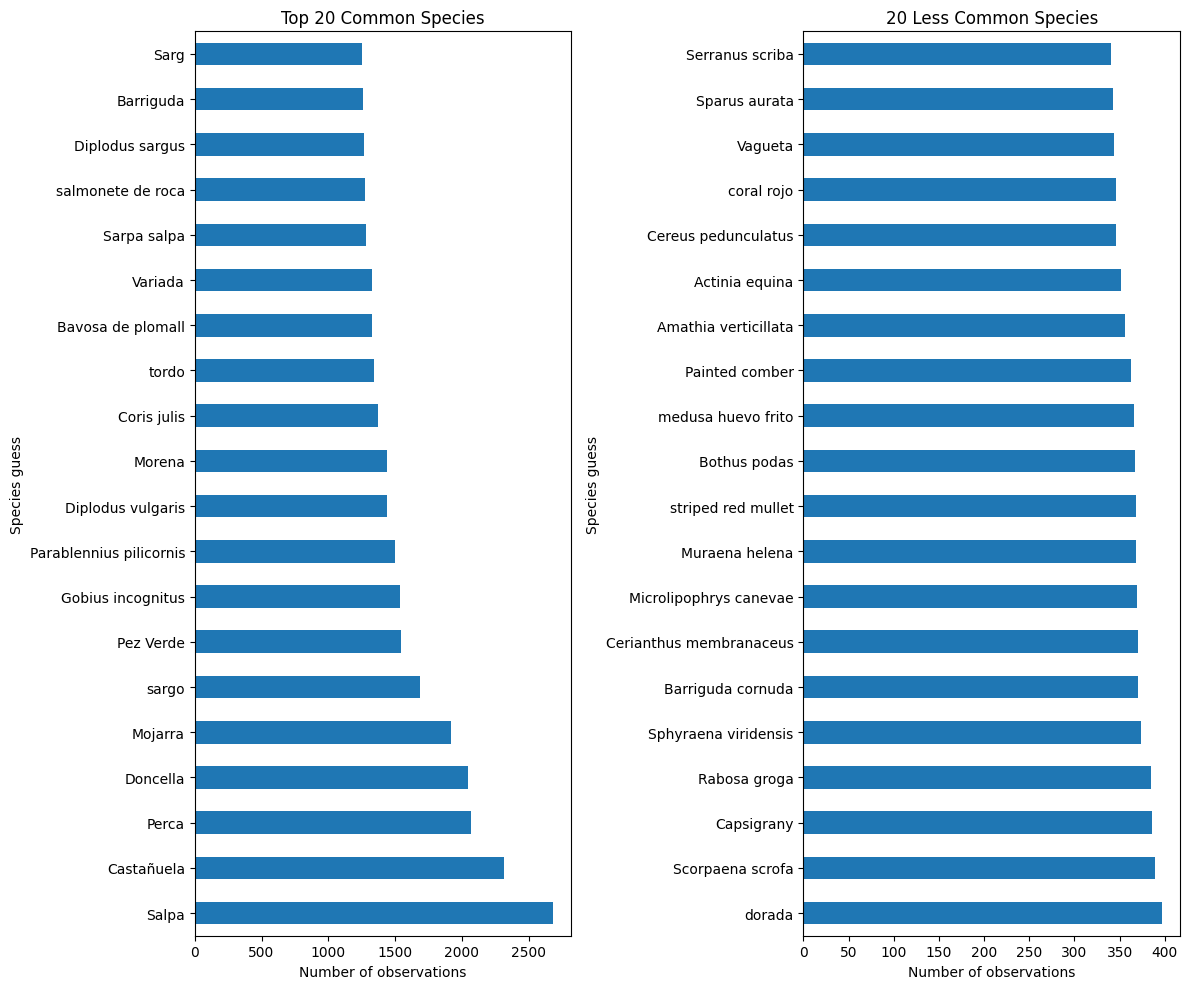

In [ ]:
plt.figure(figsize=(12, 10))

# Create a subplot for common species
plt.subplot(1, 2, 1)
species_counts[:20].plot(kind="barh")
plt.title("Top 20 Common Species")
plt.xlabel("Number of observations")
plt.ylabel("Species guess")

# Create a subplot for less common species
plt.subplot(1, 2, 2)
# Take species ranked between 100-120 as example of less common species
species_counts[100:120].plot(kind="barh")
plt.title("20 Less Common Species")
plt.xlabel("Number of observations")
plt.ylabel("Species guess")

plt.tight_layout()
plt.show()

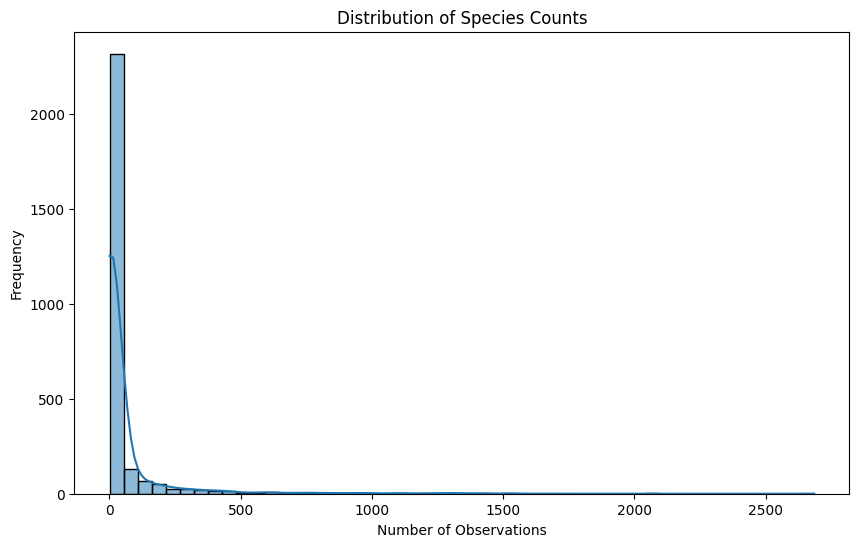

In [ ]:
plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(species_counts, bins=50, kde=True)
plt.title("Distribution of Species Counts")
plt.xlabel("Number of Observations")
plt.ylabel("Frequency")

plt.show()

In [ ]:
# Group by taxon_id and filter for groups with more than one occurrence
duplicate_taxon_ids = df.groupby("taxon_id").filter(lambda x: len(x) > 1)

# Display the first five rows of the filtered dataframe
duplicate_taxon_ids.head()

,quality_grade,license,url,image_url,tag_list,description,num_identification_agreements,num_identification_disagreements,place_guess,latitude,longitude,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,research,CC-BY-NC,https://minka-sdg.org/observations/349,https://minka-sdg.org/attachments/local_photos...,NaN,NaN,1,0,Spain,41.373576,2.191730,Spirobranchus triqueter,Spirobranchus triqueter,NaN,Annelida,251212
1,research,CC-BY-NC,https://minka-sdg.org/observations/354,https://minka-sdg.org/attachments/local_photos...,NaN,NaN,1,0,Spain,42.114682,3.167610,Nereididae,Nereididae,NaN,Annelida,1679
2,research,CC-BY-NC,https://minka-sdg.org/observations/356,https://minka-sdg.org/attachments/local_photos...,NaN,NaN,1,0,NaN,41.786561,3.045988,Protula intestinum,Protula intestinum,NaN,Annelida,244092
3,research,CC-BY-NC,https://minka-sdg.org/observations/359,https://minka-sdg.org/attachments/local_photos...,NaN,NaN,1,0,Spain,41.373576,2.191730,Actinia striata,Actinia striata,NaN,Cnidaria,253919
4,research,CC-BY-NC,https://minka-sdg.org/observations/361,https://minka-sdg.org/attachments/local_photos...,NaN,NaN,1,0,Spain,41.409211,2.227426,Branchiomma luctuosum,Branchiomma luctuosum,NaN,Annelida,34800


In [ ]:
import os
import requests
from tqdm import tqdm
import time
import re

# Create main dataset directory
if not os.path.exists('dataset'):
    os.makedirs('dataset')

# Get unique scientific names and create directories
unique_species = df['scientific_name'].dropna().unique()

# Function to convert scientific names to valid directory names
def clean_directory_name(name):
    if pd.isna(name):
        return "unknown"
    # Convert to lowercase and replace spaces with underscores
    name = str(name).lower().strip()
    name = re.sub(r'\s+', '_', name)
    # Remove any characters that aren't suitable for directory names
    name = re.sub(r'[^\w_-]', '', name)
    return name

# Create directories for each species
for species in unique_species:
    clean_name = clean_directory_name(species)
    species_dir = os.path.join('dataset', clean_name)
    if not os.path.exists(species_dir):
        os.makedirs(species_dir)

# Function to download an image
def download_image(url, save_path):
    try:
        response = requests.get(url, stream=True, timeout=10)
        response.raise_for_status()
        
        with open(save_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        return True
    except Exception as e:
        print(f"Error downloading {url}: {e}")
        return False

# Download images
success_count = 0
error_count = 0

# Use tqdm for progress bar
for idx, row in tqdm(df.iterrows(), total=len(df), desc="Downloading images"):
    if pd.isna(row['scientific_name']) or pd.isna(row['image_url']):
        continue
    
    clean_name = clean_directory_name(row['scientific_name'])
    species_dir = clean_name
    
    # Create a unique filename using the scientific name and observation ID
    try:
        obs_id = row['url'].split('/')[-1]
        filename = f"{clean_name}_{obs_id}.jpg"
    except:
        # Fallback to index if URL parsing fails
        filename = f"{clean_name}_image_{idx}.jpg"
    
    save_path = os.path.join('dataset', species_dir, filename)
    
    # Skip if file already exists
    if os.path.exists(save_path):
        continue
    
    # Download the image
    if download_image(row['image_url'], save_path):
        success_count += 1
    else:
        error_count += 1
    
    # Add a small delay to avoid overloading the server
    time.sleep(0.1)

print(f"Download complete. Successfully downloaded {success_count} images. Failed: {error_count}")